In [1]:
import numpy as np
import scipy as sp
from astropy.io import fits
import matplotlib
%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plt
import PIL
from PIL import Image
from scipy.ndimage import correlate
import matplotlib.colors as colors
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray
print('Import done')
from matplotlib.colors import LogNorm
from scipy.ndimage import gaussian_filter
from scipy.spatial import Delaunay
from scipy.spatial import cKDTree
from scipy.spatial import KDTree
from scipy.interpolate import griddata
from scipy.optimize import minimize
from scipy.optimize import curve_fit
from scipy.optimize import leastsq
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
print(sns.__version__)
from pyHIIExplorer.HIIblob import *
from astropy.table import QTable, Table, Column
from astropy import units as u


#
#
#
#from HIIblobEXTRACT import *
from extract import *
import time

#
# Only for plotting
#
def add_colorbar(im, aspect=20, pad_fraction=0.5, **kwargs):
    """Add a vertical color bar to an image plot."""
    divider = axes_grid1.make_axes_locatable(im.axes)
    width = axes_grid1.axes_size.AxesY(im.axes, aspect=1./aspect)
    pad = axes_grid1.axes_size.Fraction(pad_fraction, width)
    current_ax = plt.gca()
    cax = divider.append_axes("right", size=width, pad=pad)
    plt.sca(current_ax)
    return im.axes.figure.colorbar(im, cax=cax, **kwargs)
from mpl_toolkits import axes_grid1


#from resizeimage import resizeimage

Import done
0.8.1


1sig Ha-map =  0.0006869516942758302 ; 1sig MUSE-V  5.729850391906235e-06
# HII reg. Initial =  799
# HII reg. 2nd =  712
# HII reg. additional =  361
# X_sqr =  2.736843022757752
# HII reg clean= 859


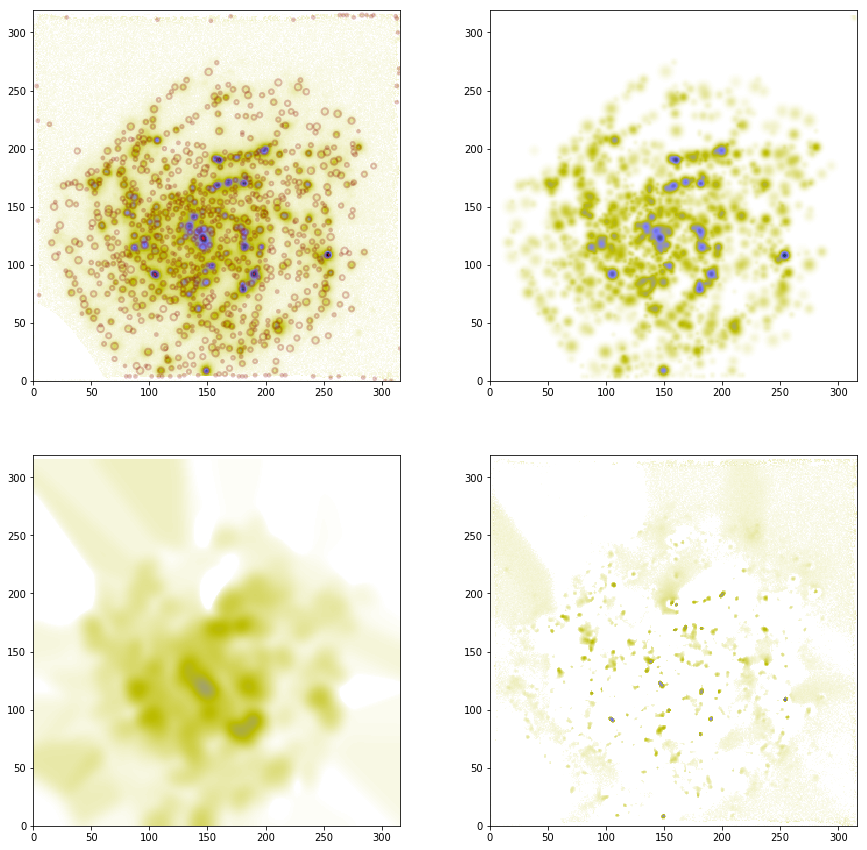

In [2]:
name = "HCG91c"


n_Ha = 20
n_eHa = 140

#spax_sca_MUSE = 1  #EN REALIDAD ES CALIFA, TODO DONDE DIGA MUSE ES DE CALIFA .. NECESITO REVISAR EL ERROR EN HIIBLOB
#FWHM_MUSE = 2.4 #EN REALIDAD ES CALIFA, TODO DONDE DIGA MUSE ES DE CALIFA .. NECESITO REVISAR EL ERROR EN HIIBLOB

#FWHM_MUSE = FWHM_MUSE/spax_sca_MUSE
spax_sca_MUSE = 0.2   
FWHM_MUSE = 1.0
FWHM_MUSE = FWHM_MUSE/spax_sca_MUSE


#file = name+".Pipe3D.cube.fits"
file=name+".flux_elines.cube.fits.gz"
hdu = fits.open(file)
data = hdu[0].data
hdr_fe = hdu[0].header
F_Ha_MUSE = data[n_Ha,:,:]
eF_Ha_MUSE = data[n_eHa,:,:]

file_SSP=name+".SSP.cube.fits.gz"
hdu_ssp=fits.open(file_SSP)
data_SSP=hdu_ssp[0].data
hdr_ssp=hdu_ssp[0].header

file_SFH=name+".SFH.cube.fits.gz"
hdu_sfh=fits.open(file_SFH)
data_SFH=hdu_sfh[0].data
hdr_sfh=hdu_sfh[0].header

file_INDEX=name+".indices.CS.cube.fits.gz"
hdu_index=fits.open(file_INDEX)
data_INDEX=hdu_index[0].data
hdr_index=hdu_index[0].header
hdr_index["INDEX5"] = "D_4000"

F_Ha_MUSE = np.ma.masked_invalid(F_Ha_MUSE)
#V_MUSE = np.ma.masked_invalid(V_MUSE)


#F_Ha_MUSE = F_Ha_MUSE/eF_Ha_MUSE
CONT_MUSE = gaussian_filter(F_Ha_MUSE, sigma=FWHM_MUSE)
blobs_final,blobs_F_Ha,image_HII,diff_map_final,diff_points,diff_Flux=HIIblob(F_Ha_MUSE,CONT_MUSE, FWHM_MUSE,MUSE_1sig=0, 
                                                                              MUSE_1sig_V=0, plot=1, refined =0)
#blobs_final,blobs_F_Ha,image_HII,diff_map_final,diff_points,diff_Flux=HIIblob(F_Ha_MUSE,CONT_MUSE, 
#                                                                              FWHM_MUSE,MUSE_1sig=-0.1, MUSE_1sig_V=-0.1, plot=1, refined =0)



In [3]:
#print(hdr_fe)
#print(hdr_ssp)
#plt.imshow(diff_map_final)
#plt.show()
#len(diff_map_final)

In [4]:
nx=hdr_fe["NAXIS1"]
ny=hdr_fe["NAXIS2"]
blobs=blobs_final


#image_seg_HII=create_HII_seg(blobs, nx, ny)
##plt.imshow(image_seg_HII, interpolation="none")
#plt.show()

In [5]:
#image_seg_DIG=create_DIG_seg(blobs, nx, ny)
#plt.imshow(image_seg_DIG)
#plt.show()

In [6]:
#img_diff = create_diff_new(Ha_image_clean,blobs,FWHM_MUSE,diff_points)
#flux_HII,img_HII,img_diff,diff_points,diff_val = HIIextraction(map_now,blobs_final,kind=kind, we=2, refined=refined)
#img_diff,diff_points,diff_Flux = create_diff(img_diff,blobs_final,FWHM_MUSE=1.0)

In [7]:
flux_HII = blobs_F_Ha
img_HII = image_HII
img_diff = diff_map_final #UTILIZO EL NUEVO DIFUSO ACA?
WCS, hdu_HII, hdu_DIG, table_HII, table_DIG = extracting_flux_elines(name, hdu, blobs_final, diff_points,  plot=0)

In [8]:
hdu_SSP_HII, hdu_SSP_DIG, table_SSP_HII, table_SSP_DIG = extracting_ssp(name, hdu_ssp, WCS, blobs_final, diff_points, plot=0)

In [9]:
hdu_SFH_HII, hdu_SFH_DIG, table_SFH_HII, table_SFH_DIG = extracting_sfh(name, hdu_sfh, WCS, blobs_final, diff_points,  plot=0)

In [10]:
hdu_INDEX_HII, hdu_INDEX_DIG, table_INDEX_HII, table_INDEX_DIG = extracting_index(name, hdu_index, WCS, blobs_final, diff_points, plot=0)

In [11]:
DIR = "Archivos"
write = write_all(DIR, name, hdu_HII, hdu_DIG, table_HII, table_DIG, hdu_SSP_HII, hdu_SSP_DIG, table_SSP_HII, 
                  table_SSP_DIG,hdu_SFH_HII, hdu_SFH_DIG, table_SFH_HII, table_SFH_DIG, hdu_INDEX_HII, 
                  hdu_INDEX_DIG, table_INDEX_HII, table_INDEX_DIG)

Finish writing in Archivos
